<a href="https://colab.research.google.com/github/Rahafhosari/DataScience2024-2025/blob/master/mock_belt1_reviewer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Literacy Rates
---
Your task is to clean and explore data for a non-profit organization focused on promoting and increasing youth literacy rates.

*Name : Rahaf Hosari*

## Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Imports

In [3]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [45]:
url='/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week04/Data/Belt Reviewer/literacy_rates_updated - literacy_rates_updated.csv'
df = pd.read_csv(url)

#### Summary of Data

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Region         3309 non-null   object
 1   Country        3313 non-null   object
 2   Year           3313 non-null   object
 3   Age            3313 non-null   object
 4   Gender         3313 non-null   object
 5   Literacy rate  3308 non-null   object
dtypes: object(6)
memory usage: 155.4+ KB


#### First 5 rows

In [47]:
df.head()

,Region,Country,Year,Age,Gender,Literacy rate
0,Central and Southern Asia,Afghanistan,2011,<15,female,0.1761206
1,Central and Southern Asia,Afghanistan,2011,<15,male,0.454171
2,NaN,Afghanistan,2011,15-24,female,0.3211322
3,NaN,Afghanistan,2011,15-24,male,0.6187907
4,Central and Southern Asia,Afghanistan,2011,25-64,female,0.0841276


#### Data Types

In [48]:
df.dtypes

,0
Region,object
Country,object
Year,object
Age,object
Gender,object
Literacy rate,object




```
By obesriving the data types above the "Literacy Rate" and "Year" should be converted to Numerics data types.
```



##Data Cleaning

Ensure all columns match the data types listed in the data dictionary.
### Convert Data Types

#### Year Column

In [68]:
df['Year'] = df['Year'].astype(int)

ValueError: invalid literal for int() with base 10: '2011_'

Replace '_' with empty string

In [69]:
df['Year'].value_counts(dropna=False)

,count
Year,
2018,574
2011,454
2014,439
2010,400
2012,344
2015,316
2013,264
2016,264
2017,246


In [70]:
df['Year'] = df['Year'].str.replace("_",'')

In [71]:
df['Year'].value_counts(dropna=False)

,count
Year,
2018,574
2011,455
2014,439
2010,400
2012,344
2015,316
2013,264
2016,264
2017,246


After Solving Issue, try to change data type again

In [72]:
df['Year'] = df['Year'].astype(int)

Make sure of change by checking Data types again

In [73]:
df.dtypes

,0
Region,object
Country,object
Year,int64
Age,object
Gender,object
Literacy rate,object


#### Literacy Rate Column

In [75]:
df['Literacy rate'].value_counts(dropna=False)

,count
Literacy rate,
1,19
0.996,7
0.992,5
0.997,5
0.999,5
...,...
0.9105143,1
0.9633402,1
0.9648063,1


In [76]:
df['Literacy rate'] = df['Literacy rate'].astype(float)

ValueError: could not convert string to float: '45.38%'

In [79]:
df['Literacy rate'] = df['Literacy rate'].str.replace("%",'')
df['Literacy rate'] = df['Literacy rate'].astype(float)
df.dtypes

,0
Region,object
Country,object
Year,int64
Age,object
Gender,object
Literacy rate,float64


Identify and address any inconsistencies in categorical values (example: cat, Cat, cats)
### Inconsistency

Check other columns for inconsistensy

In [24]:
# Select all columns
all_columns = df.columns

# loop through the list of string columns
for column in all_columns:
  # print the value counts for the column
  count =  df[column].value_counts()
  print(f"Value counts for {column} : {count}")
  print()

Value counts for Region : Region
Latin America and the Caribbean     943
Sub-Saharan Africa                  770
Northern Africa and Western Asia    569
Europe and Northern America         337
Central and Southern Asia           310
Eastern and South-Eastern Asia      284
Oceania                              96
Name: count, dtype: int64

Value counts for Country : Country
Mexico                 73
Uruguay                72
Brazil                 72
Bangladesh             66
Palestine              64
                       ..
Croatia                 8
Bulgaria                8
Sudan                   8
Belarus                 8
Antigua and Barbuda     4
Name: count, Length: 155, dtype: int64

Value counts for Year : Year
2018    575
2011    456
2014    440
2010    402
2012    344
2015    316
2013    268
2016    265
2017    246
3014      1
Name: count, dtype: int64

Value counts for Age : Age
<15      843
15-24    829
25-64    828
65+      813
Name: count, dtype: int64

Value counts for 

From the data above, for the Gender column there's inconsistency in Genders, such that 4 rows have value 'F' and 3 have value 'M'.
Change them to the corresponding values of female and male.

In [31]:
df['Gender'] = df['Gender'].replace(to_replace='F',value="female")
df['Gender'] = df['Gender'].replace(to_replace='M',value="male")
df['Gender'].value_counts().sort_values(ascending=False)

,count
Gender,
female,1659
male,1654


Identify and address any duplicate values.
### Duplicates

In [43]:
duplicated_rows = df.duplicated()
duplicated_rows.sum()

10

In [44]:
df[duplicated_rows].sort_values(by='Country')

,Region,Country,Year,Age,Gender,Literacy rate
18,Central and Southern Asia,Bangladesh,2011,15-24,female,0.795445
39,Central and Southern Asia,Bangladesh,2013,65+,female,0.153041
347,Eastern and South-Eastern Asia,China,2010,<15,female,0.927112
1158,Latin America and the Caribbean,Colombia,2010,15-24,female,0.985172
1279,Latin America and the Caribbean,Dominican Republic,2016,15-24,female,0.988674
2030,Northern Africa and Western Asia,Egypt,2013,65+,male,0.571875
167,Central and Southern Asia,Maldives,2014,25-64,male,0.989056
1558,Latin America and the Caribbean,Mexico,2013,<15,female,0.929039
763,Europe and Northern America,Portugal,2018,25-64,female,0.987342
513,Eastern and South-Eastern Asia,Singapore,2013,<15,male,0.985425


#### Drop Duplicated rows but keep first

In [55]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [51]:
df[duplicated_rows].sort_values(by='Country')

<ipython-input-51-059b6100db6e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[duplicated_rows].sort_values(by='Country')


,Region,Country,Year,Age,Gender,Literacy rate




```
No more duplicate Values
```



- Identify and address any missing values in this dataset. Fill in missing values with a placeholder appropriate for the data type.
- Identify and address any inappropriate or unusual data points (example: age cannot be 325)
### Missing Values

In [32]:
df.isna().sum()

,0
Region,4
Country,0
Year,0
Age,0
Gender,0
Literacy rate,5




```
There are 4 values missing in Region and 5 missing in Literacy rate
```



<Axes: >

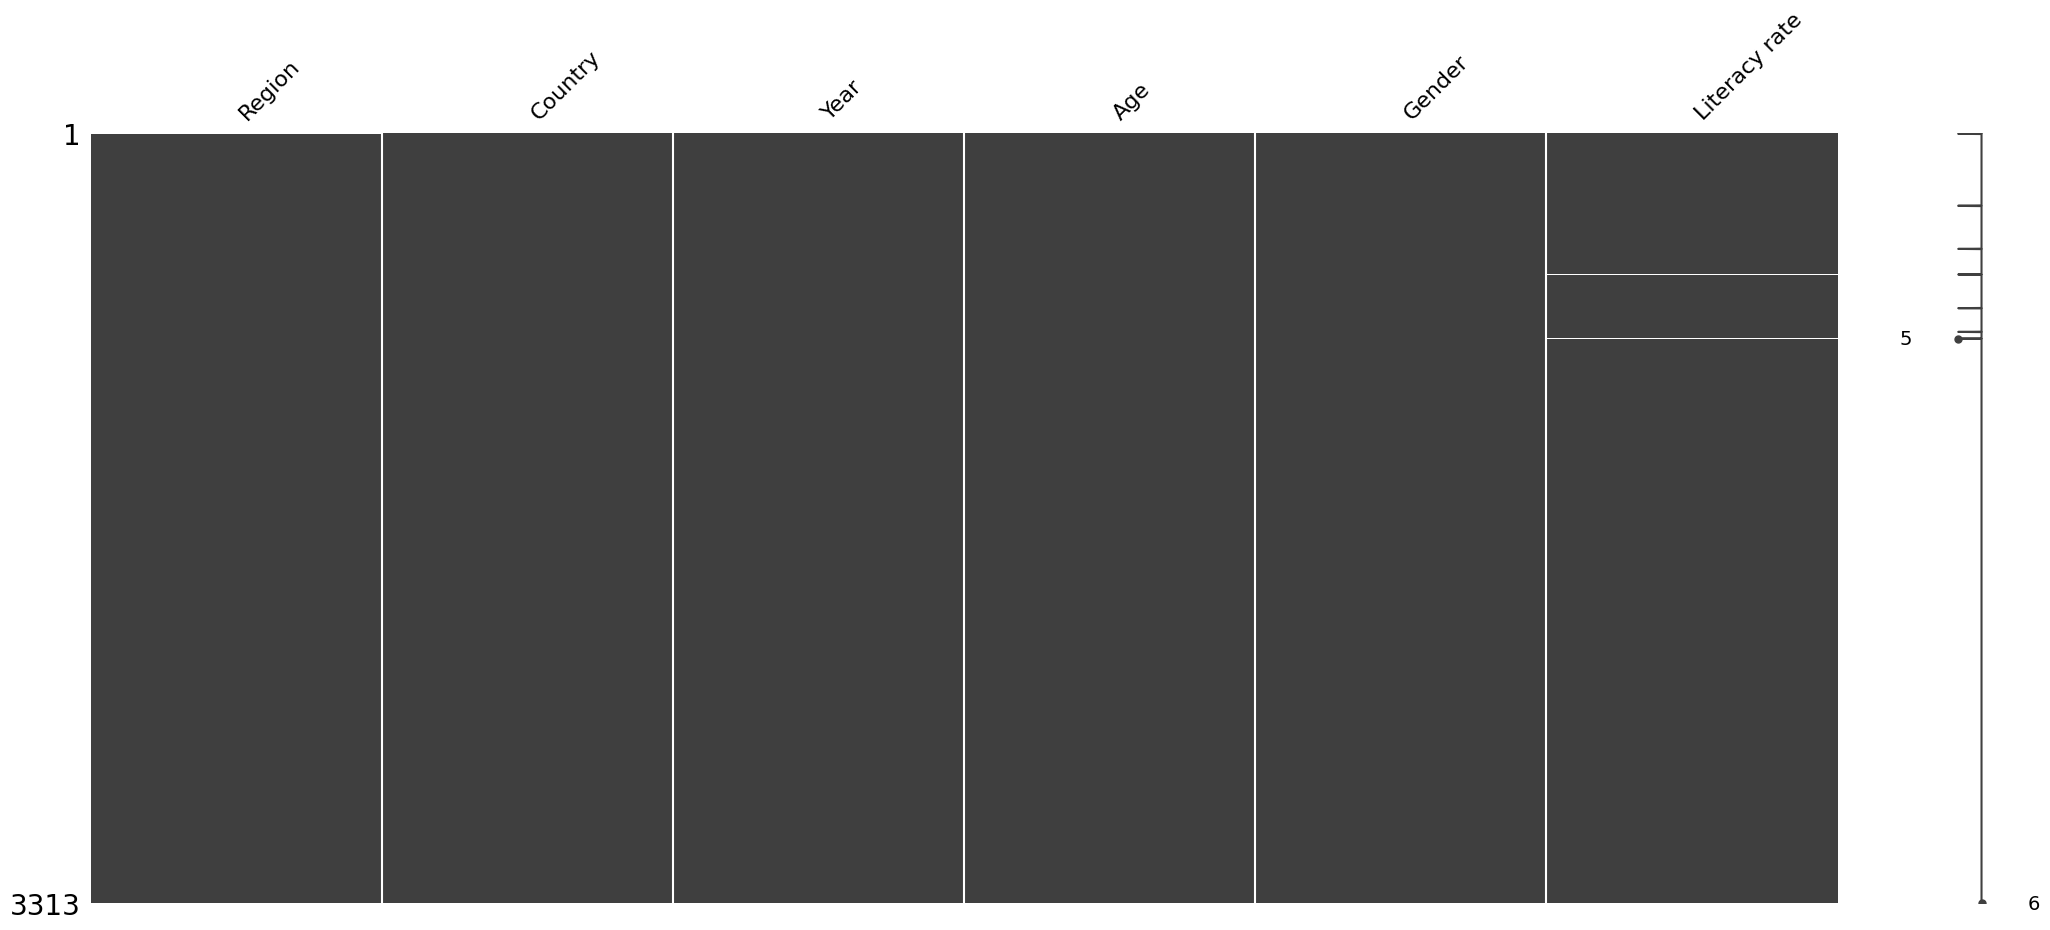

In [33]:
# Visualize the missing values using the missingno package's matrix plot.
msno.matrix(df)

#### Region Missing Values

In [56]:
#the rows where Region is Missing
df[df['Region'].isna()]

,Region,Country,Year,Age,Gender,Literacy rate
2,NaN,Afghanistan,2011,15-24,female,0.3211322
3,NaN,Afghanistan,2011,15-24,male,0.6187907
312,NaN,Uzbekistan,2016,65+,female,0.9966975
313,NaN,Uzbekistan,2016,65+,male,0.9990176




```
All four rows with missing Region have Country of Afghanistan and Uzbekistan.
Looking back at the data set, both countries mention belong to the "Central and Southern Asia". Therefore, missing region for all four rows will be replaced with "Central and Southern Asia".
```



Replace missing value with 'Central and Southern Asia'

In [60]:
df['Region'] = df['Region'].fillna('Central and Southern Asia')

In [61]:
#Checking if there's missing values still
df['Region'].isna().sum()

0

#### Literacy Rate Missing Values

In [67]:
#Rows where Literacy Rate is Missing
df[df['Literacy rate'].isna()]

,Region,Country,Year,Age,Gender,Literacy rate
498,Eastern and South-Eastern Asia,Singapore,2010,65+,male,NaN
608,Europe and Northern America,Albania,2012,15-24,female,NaN
753,Europe and Northern America,Portugal,2011,15-24,male,NaN
855,Europe and Northern America,Spain,2010,<15,female,NaN
884,Europe and Northern America,Spain,2013,25-64,male,NaN


For the above data of missing Literacy Rate, and for accuracy fill the missing data as following:
1. Find Mean LR for Males in Singapore with Age 65+.
2. Find Mean LR for Female in Albania with Age 15-24.
3. Find Mean LR for Males in Portugal with Age 15-24.
4. Find Average LR for Females in Spain with age <15.
5. Find Mean LR for Males in Spain with Age 25-64.


OR we might fill it with whole literacy rate among Males in Singapors in 2010 regardless of age.



##### Find Mean LR for Males in Singapore with Age 65+.

In [98]:
# Find average literacy rate for males in Singapore with age 65+
singapore_male_65plus = df[(df['Country'] == 'Singapore') & (df['Gender'] == 'male') & (df['Age'] == '65+') ]
singapore_male_65plus_mean = singapore_male_65plus['Literacy rate'].mean()

print(f"The average literacy rate for males in Singapore aged 65+ is: {average_literacy_rate}")
## The average literacy rate for males in Singapore aged 65+ is: 0.9462572

The average literacy rate for males in Singapore aged 65+ is: 0.9462572


In [97]:
# Find Mean LR for Males in Singapore in 2010 regardless of age.
# singapore_male_2010 = df[(df['Country'] == 'Singapore') & (df['Gender'] == 'male') & (df['Year'] == 2010)]
# average_literacy_rate_sgp_male_2010 = singapore_male_2010['Literacy rate'].mean()

# print(f"The average literacy rate for males in Singapore in 2010 is: {average_literacy_rate_sgp_male_2010}")
## The average literacy rate for males in Singapore in 2010 is: 0.9774965499999999

#NOTE : First Apporach is Chosen which is Mean LR among Gender and age in a Specific Country Regardless of year

The average literacy rate for males in Singapore in 2010 is: 0.9774965499999999


In [99]:
df.loc[(df['Country'] == 'Singapore') & (df['Gender'] == 'male') & (df['Age'] == '65+') & (df['Year'] == 2010) & (df['Literacy rate'].isnull()), 'Literacy rate'] = singapore_male_65plus_mean

In [100]:
#Genearlized Function:-
def fill_missing_literacy_rate(df, country, gender, age, year):
  #Filtered Data
  country_gender_age_selection = df[(df['Country'] == country) & (df['Gender'] == gender) & (df['Age'] == age) ]
  #Literacy Rate Mean for selected data
  data_selected_mean = country_gender_age_selection['Literacy rate'].mean()
  #Fill Missing Data
  df.loc[(df['Country'] == country) & (df['Gender'] == gender) & (df['Age'] == age) & (df['Year'] == year) & (df['Literacy rate'].isnull()), 'Literacy rate'] = data_selected_mean

##### Find Mean LR for Female in Albania with Age 15-24. (2012)

In [101]:
# albania_female_15_24 = df[(df['Country'] == 'Albania') & (df['Gender'] == 'female') & (df['Age'] == '15-24') ]
# albania_female_15_24_mean = albania_female_15_24['Literacy rate'].mean()
fill_missing_literacy_rate(df,'Albania','female','15-24',2012)

##### Find Mean LR for Males in Portugal with Age 15-24. (2011)

In [102]:
fill_missing_literacy_rate(df,'Portugal','male','15-24',2011)

##### Find Average LR for Females in Spain with age <15. (2010)

In [103]:
fill_missing_literacy_rate(df,'Spain','female','<15',2010)

##### Find Mean LR for Males in Spain with Age 25-64. (2013)

In [104]:
fill_missing_literacy_rate(df,'Spain','male','25-64',2013)

Check for missing Values again

In [108]:
#Rows where Literacy Rate is Missing
df['Literacy rate'].isna().sum()

0

Visualize

<Axes: >

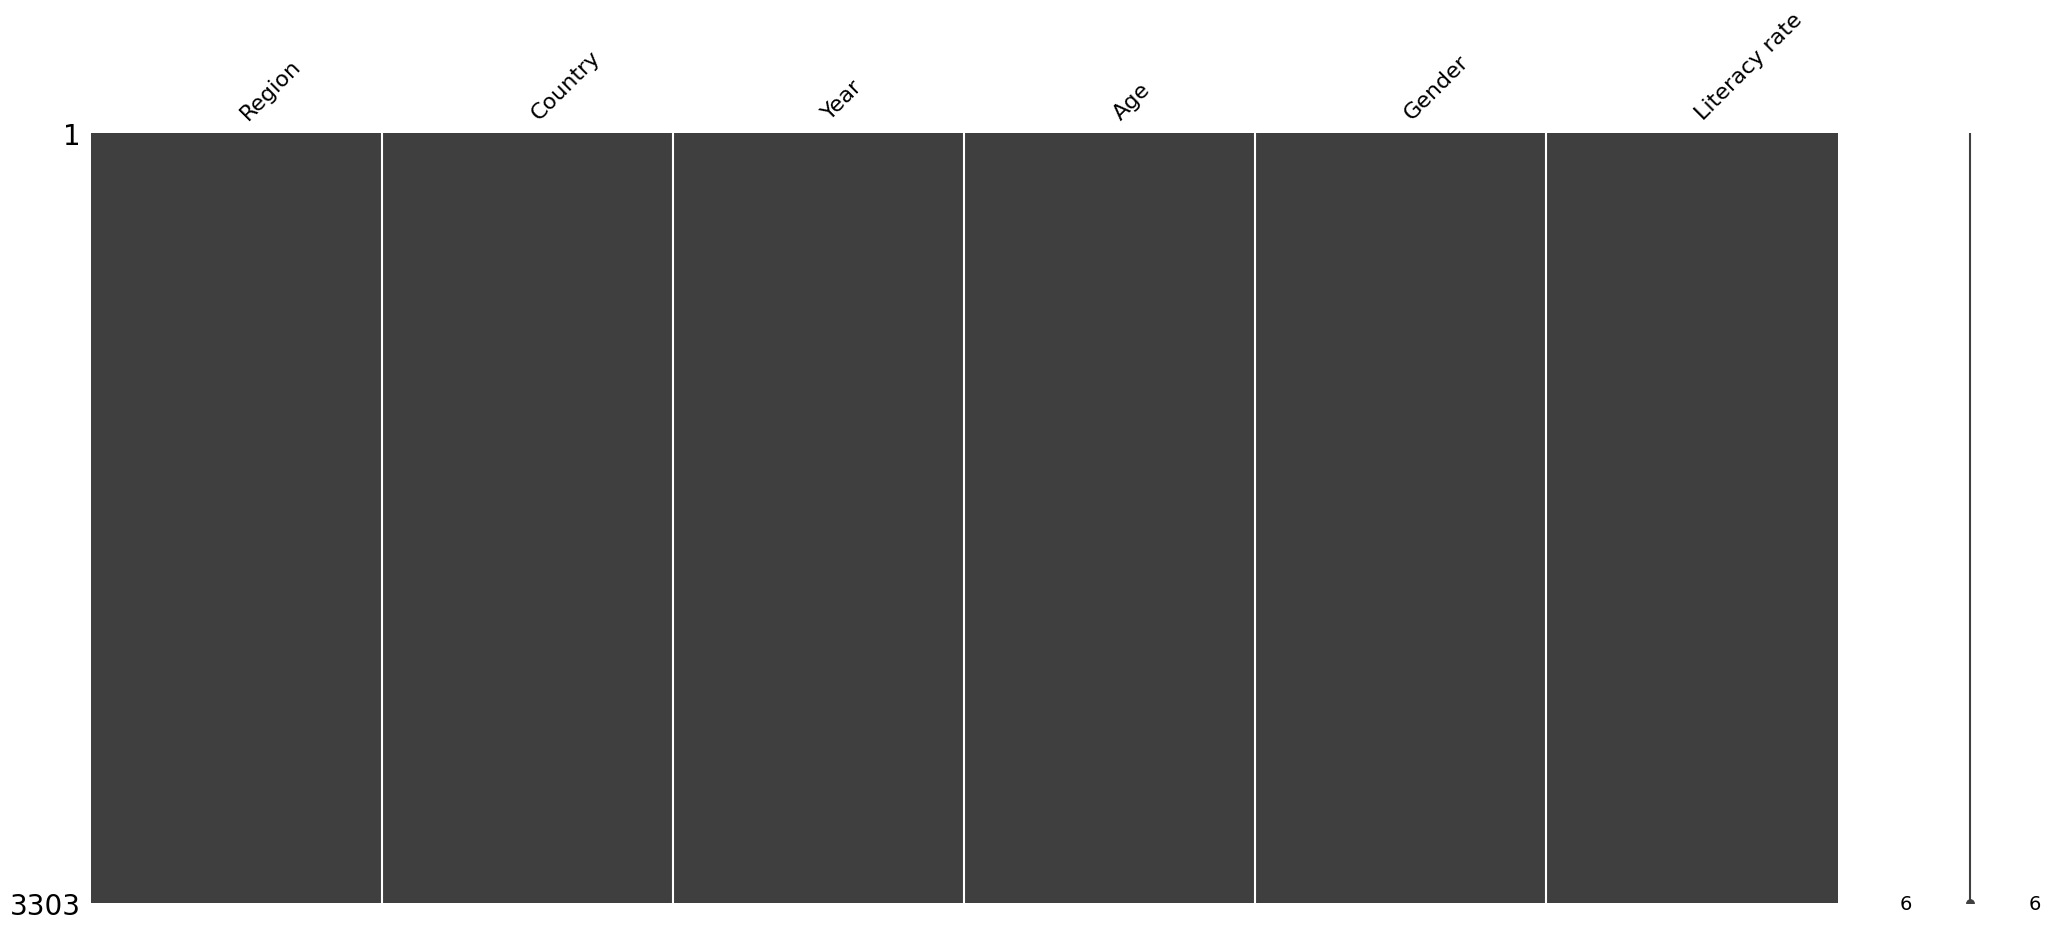

In [109]:
msno.matrix(df)

## Data Visualization
---
The next step is to complete an exploration of the data using Python. This should include:

- Two different types of univariate exploratory visualizations. Each visualization must include a brief interpretation within the code file.
- Two different types of multivariate exploratory visualizations. Each visualization must include a brief interpretation within the code file.

###Univarite

In [ ]:
Count of males and Females in each country

### Multivariate